# RNN

- 특징: 입력과 분석이 시퀀싱한 형태로 이뤄짐. T+1의 계산에 T 기의 데이터가 사용된다. 
- 사례: 문장이나 시계열 모델이 대표적인 사례.
- 계산하는 방식: $h_t$를 계산할때 이전의 state $h_{t-1}$이 들어간다.
$$h_t = f_W(h_{t-1}, x_t) $$
$h_t$ : new state
$f_w$ : some function with param W
$H_{t-1}$: old state
$x_t$: input vector at some time step
- 핵심: x -> RNN -> y 에서 RNN이 자기 자신으로 돌아가는 것으로 표시하는 것은 RNN에서 $h_t$를 계산하는 함수 $f_{w}$가 모든 rnn 셀에 들어간다.

## Vanilla RNN

$wx$를 두고 생각하면,다음과 같은 식으로 정리할 수 있다.
 <img src=" https://wikidocs.net/images/page/22886/rnn_image4_ver2.PNG">

 $h_t = f_W(h_{t-1}, x_t)$

 $h_t = \tanh(W_{hh}h_{t-1} + W_{xh}x_t)$ 
 
 $h_t$는 $h_{t-1}$과 $x_t$에 가중치를 부여하고 하이퍼볼릭 탄젠트를 activation function으로 사용한다.
 
 $y_t = W_{hy}h_t$
 
 y를 뽑을때는 $h_t$에 가중치 $W_{hy}$를 부여한다. $W$의 형태에 따라서, 결과값의 형태가 전부 달라진다.
 
 ## 실제 RNN의 계산
 <img src=" https://wikidocs.net/images/page/22886/rnn_image2_ver3.PNG">
 
- 사례: X = [h,e,l,l,o]. training sequence "hello" 입력값 x는 onehot vector로 들어가게 된다. 
- 목표: $x_t$를 넣으면, $y_t$에 "e"가 나오는 모델, 미리 앞에 나올 문자를 미리 예측하는 모델을 만드는 것.

- $h_t$의 계산: $x_1$에서는 $h_{t-1}$값이 없기 때문에, 0으로 두고 계산한다. $x_t$와 가중치 행렬 $W_{xh}$를 계산하여, $h_t$값을 구한다.
- $y_t$의 계산: $h_t$에 가중치 $W_{hy}$를 곱해서 y_t를 구함. y_t에 소프트맥스를 구하면, $y_t$의 결과를 알 수 있음.다만 y값은 마지막 셀에만 들어가는 경우도 있음. 셀의 사용에 따라서 달라진다.
- 결과적으로 최종값의 계산에 최초값이후의 값들이 일정정도 영향을 미친다.


## RNN의 활용
- 쓰고자 하는 방법에 따라서 Y셀의 형태가 달라진다. 
<img src="http://i.imgur.com/Q8zv6TQ.png">


# RNN basic in keras

## 단일 레이어 모델
<img src="https://camo.githubusercontent.com/3bd029379545a119296ea91f94d54eea7bb7396c97c6757839c81c33748404e5/68747470733a2f2f636c6f75642e67697468756275736572636f6e74656e742e636f6d2f6173736574732f3930313937352f32333334383732372f63633938313835362d666365372d313165362d383365612d3462313837343733343636622e706e67">
x_t의 shape는 batch size, sequence lenth, input dimension으로 전처리 되어야 한다.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

x_data = tf.constant([[h]], tf.float32)
hidden_size = 2

In [3]:
## rnn 1번째 방식.
cell = layers.SimpleRNNCell(units=hidden_size) # creating SimpleRNNCell
rnn = layers.RNN(cell, return_sequences=True, return_state=True) # analogous to tf.nn.dynamic_rnn
outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[-0.2983816  -0.49517432]]], shape: (1, 1, 2)
states: [[-0.2983816  -0.49517432]], shape: (1, 2)


In [4]:
# RNN  2번째 방식
rnn = layers.SimpleRNN(units = hidden_size, return_sequences = True, return_state = True)
ouputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[-0.2983816  -0.49517432]]], shape: (1, 1, 2)
states: [[0.70752954 0.12894376]], shape: (1, 2)


## Sequencing model

In [5]:
x_data = tf.constant([[h,e,l,l,o]], tf.float32)
hidden_size = 2

In [6]:
rnn = layers.SimpleRNN(units = 2, return_sequences = True, return_state = True)
outputs, states = rnn(x_data)
print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape: (1, 5, 4)
outputs: [[[ 0.5278045   0.58650917]
  [ 0.5523772   0.45844215]
  [ 0.87264305 -0.3445563 ]
  [ 0.58223146  0.17501253]
  [-0.00154522  0.66025525]]], shape: (1, 5, 2)
states: [[-0.00154522  0.66025525]], shape: (1, 2)


## batching input

In [7]:
## shape(3,5,2) batch size:3, sequence:5, outputdim: 2
x_data = tf.constant([[h,e,l,l,o],
                     [e,o,l,l,o],
                     [l,l,e,e,l]], tf.float32)
hiden_size = 2
rnn = layers.SimpleRNN(units = 2, return_sequences = True, return_state = True)
output, states = rnn(x_data)
print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4)
outputs: [[[ 0.5278045   0.58650917]
  [ 0.5523772   0.45844215]
  [ 0.87264305 -0.3445563 ]
  [ 0.58223146  0.17501253]
  [-0.00154522  0.66025525]]], shape: (1, 5, 2)
states: [[ 0.22335221 -0.39723948]
 [ 0.8509325  -0.589404  ]
 [ 0.06450205 -0.39537302]], shape: (3, 2)


- ouuput: minibatch한 대상의 전체 sequnce에 대상하는 hiddendate의 값.


# various rnn

<img src="https://i.stack.imgur.com/b4sus.jpg">

- x와 y의 갯수에 따라서 RNN을 분류할 수 있다.
- one to many: 이미지를 입력으로 받아, 캡션을 생성하는 경우
- many to many:문장을 입력해서 문장을 배출하는 번역기나, 문장을 입력해서 형태소를 받는 형태소 분석기.
- many to one: 단어나 문장의 감정을 분석하는 sentiment classification

## many to one

<img src="https://media.vlpt.us/images/kangtae/post/e3ab2c9f-4067-4502-aea6-e7a458c32ea5/13.rnn_computational_graph(m-t-o).JPG">

 - 입력: 문장을 tokenization한 값을 입력으로 받는다.
 - word embedding: 단어를 onehot으로 입력하면 너무 sparse한 입력이 되기에, 단어를 numeric하게 바꿔줘야 한다.
 - embedding layer: x에 단어를 vector로 바꿔주는 layer가 존재한다. 
 - 오차 수정: 최후의 $\hat{y}$값과 y값의 차를 loss로 해서 backpropagation한다.

### word sentiment

In [8]:
from tensorflow.keras import Sequential, Model
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline

In [9]:
words = ['good', 'bad', 'worse', 'so good']
y_data = [1,0,0,1]

## create tokeniation dictionary
# batch 단위 연산을 해야하지만, 데이터가 sequence가 다른 경우를 보정하기 위해 pad를 사용함. 
char_set = ['<pad>'] + sorted(list(set(''.join(words))))
idx2char = {idx : char for idx, char in enumerate(char_set)}
char2idx = {char : idx for idx, char in enumerate(char_set)}
# 문자를 일련번호로 바꾸고, 일련번호의 연결로 단어를 표현한다. ex) good: 6,7,7,4

print(char_set)
print(idx2char)
print(char2idx)

['<pad>', ' ', 'a', 'b', 'd', 'e', 'g', 'o', 'r', 's', 'w']
{0: '<pad>', 1: ' ', 2: 'a', 3: 'b', 4: 'd', 5: 'e', 6: 'g', 7: 'o', 8: 'r', 9: 's', 10: 'w'}
{'<pad>': 0, ' ': 1, 'a': 2, 'b': 3, 'd': 4, 'e': 5, 'g': 6, 'o': 7, 'r': 8, 's': 9, 'w': 10}


In [10]:
# converting sequence of tokens to sequence of indices
x_data = list(map(lambda word : [char2idx.get(char) for char in word], words))
x_data_len = list(map(lambda word : len(word), x_data))

print(x_data)
print(x_data_len)

[[6, 7, 7, 4], [3, 2, 4], [10, 7, 8, 9, 5], [9, 7, 1, 6, 7, 7, 4]]
[4, 3, 5, 7]


In [11]:
# padding the sequence of indices
# 단어들을 padding 해야함. 0 값으로 padding하는게 기본
max_sequence = 10
x_data = pad_sequences(sequences = x_data, maxlen = max_sequence,
                       padding = 'post', truncating = 'post')

# checking data
print(x_data)
print(x_data_len)
print(y_data)

[[ 6  7  7  4  0  0  0  0  0  0]
 [ 3  2  4  0  0  0  0  0  0  0]
 [10  7  8  9  5  0  0  0  0  0]
 [ 9  7  1  6  7  7  4  0  0  0]]
[4, 3, 5, 7]
[1, 0, 0, 1]


### create model

In [12]:
import numpy as np

In [13]:
input_dim = len(char2idx)
output_dim = len(char2idx)
one_hot = np.eye(len(char2idx))
hidden_size = 10
num_classes = 2

model = Sequential()
model.add(layers.Embedding(input_dim=input_dim, output_dim = output_dim,
                           trainable = False, mask_zero = True, input_length = max_sequence, 
                           embeddings_initializer = keras.initializers.Constant(one_hot)))
model.add(layers.SimpleRNN(units = hidden_size))
model.add(layers.Dense(units = num_classes)) # many to one 에서 one에 해당한다.
# mask_zero = True 전처리 단계에서 패딩 된 부분은 연산에서 제외
# trainable true: onehot을 train하지 않는다.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 11)            121       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 10)                220       
_________________________________________________________________
dense (Dense)                (None, 2)                 22        
Total params: 363
Trainable params: 242
Non-trainable params: 121
_________________________________________________________________


In [15]:
## create loss function

def loss_fn(model, x, y):
    return tf.compat.v1.losses.sparse_softmax_cross_entropy(labels = y, logits = model(x))

In [16]:
## create optimizer
lr = .01
epochs = 30
batch_size = 2
opt = tf.keras.optimizers.Adam(lr)

In [17]:
## generate pipeline
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)) # dataset instance
tr_dataset = tr_dataset.shuffle(buffer_size = 4)
tr_dataset = tr_dataset.batch(batch_size = batch_size)

print(tr_dataset)

<BatchDataset shapes: ((None, 10), (None,)), types: (tf.int32, tf.int32)>


In [18]:
## training
tr_loss_hist = []


for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb in tr_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x = x_mb, y = y_mb) ## minibatch 마다의 cross entropy
        grads = tape.gradient(target = tr_loss, sources = model.variables) 
        opt.apply_gradients(grads_and_vars=zip(grads, model.variables)) # gradinet descent
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
        
    if (epoch +1 ) % 5 == 0:
        print(epoch, avg_tr_loss)

4 tf.Tensor(0.23411113, shape=(), dtype=float32)
9 tf.Tensor(0.037457384, shape=(), dtype=float32)
14 tf.Tensor(0.011339604, shape=(), dtype=float32)
19 tf.Tensor(0.005884296, shape=(), dtype=float32)
24 tf.Tensor(0.004054619, shape=(), dtype=float32)
29 tf.Tensor(0.0031857477, shape=(), dtype=float32)


acc : 100.00%


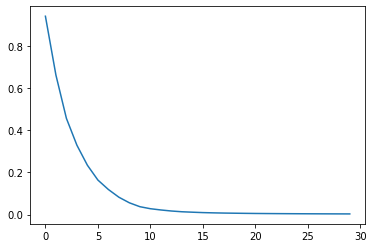

In [19]:
import matplotlib.pyplot as plt
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis = -1)
print('acc : {:.2%}'.format(np.mean(yhat == y_data)))
plt.plot(tr_loss_hist)

### many to one stacking

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbq2eGC%2FbtqDx5KIkkV%2FuLvZu6kmXJfVttnV3Axibk%2Fimg.png">

- stacking: RNN을 여러개 쌓는 것. multilayer RNN, stacked RNN
- stacking의 이점
    - input과 가까운 부분에서는 edge와 같은 global한 feature을 찾을 수 있음. NLP에선 Syntatic한 정보를 가짐.
    - output과 가까운 부분에서는 좀더 abstract한 feature를 찾을 수 있음. NLP에선 Semantic한 정보를 가짐
    - 좋은 성능을 만든다.


In [72]:
# example data
sentences = [['I', 'feel', 'hungry'],
     ['tensorflow', 'is', 'very', 'difficult'],
     ['tensorflow', 'is', 'a', 'framework', 'for', 'deep', 'learning'],
     ['tensorflow', 'is', 'very', 'fast', 'changing']]
pos = [['pronoun', 'verb', 'adjective'],
     ['noun', 'verb', 'adverb', 'adjective'],
     ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
     ['noun', 'verb', 'adverb', 'adjective', 'verb']]

In [73]:
# creating a token dictionary for word
word_list = sum(sentences, [])
word_list = sorted(set(word_list))
word_list = ['<pad>'] + word_list
word2idx = {word : idx for idx, word in enumerate(word_list)}
idx2word = {idx : word for idx, word in enumerate(word_list)}

print(word2idx)
print(idx2word)
print(len(idx2word))

{'<pad>': 0, 'I': 1, 'a': 2, 'changing': 3, 'deep': 4, 'difficult': 5, 'fast': 6, 'feel': 7, 'for': 8, 'framework': 9, 'hungry': 10, 'is': 11, 'learning': 12, 'tensorflow': 13, 'very': 14}
{0: '<pad>', 1: 'I', 2: 'a', 3: 'changing', 4: 'deep', 5: 'difficult', 6: 'fast', 7: 'feel', 8: 'for', 9: 'framework', 10: 'hungry', 11: 'is', 12: 'learning', 13: 'tensorflow', 14: 'very'}
15


In [74]:
# creating a token dictionary for part of speech
pos_list = sum(pos, [])
pos_list = sorted(set(pos_list))
pos_list = ['<pad>'] + pos_list
pos2idx = {pos : idx for idx, pos in enumerate(pos_list)}
idx2pos = {idx : pos for idx, pos in enumerate(pos_list)}

print(pos2idx)
print(idx2pos)
print(len(pos2idx))


{'<pad>': 0, 'adjective': 1, 'adverb': 2, 'determiner': 3, 'noun': 4, 'preposition': 5, 'pronoun': 6, 'verb': 7}
{0: '<pad>', 1: 'adjective', 2: 'adverb', 3: 'determiner', 4: 'noun', 5: 'preposition', 6: 'pronoun', 7: 'verb'}
8


In [75]:
# padding the sequence of indices
max_sequence = 10
x_data = pad_sequences(sequences = x_data, maxlen = max_sequence,
                       padding = 'post', truncating = 'post')

# checking data
print(x_data)
print(x_data_len)
print(y_data)

[[ 1  7 10  0  0  0  0  0  0  0]
 [13 11 14  5  0  0  0  0  0  0]
 [13 11  2  9  8  4 12  0  0  0]
 [13 11 14  6  3  0  0  0  0  0]]
[3, 4, 7, 5]
[[6 7 1 0 0 0 0 0 0 0]
 [4 7 2 1 0 0 0 0 0 0]
 [4 7 3 4 5 1 4 0 0 0]
 [4 7 2 1 7 0 0 0 0 0]]


In [76]:
## rnn을 2개 사용하는 stacked RNN구조를 만들어보자.

num_classes = 2
hidden_dims = [10,10]

input_dim = len(char2idx)
output_dim = len(char2idx)
one_hot = np.eye(len(char2idx))

model = Sequential()
model.add(layers.Embedding(input_dim = input_dim, output_dim = output_dim,
                          trainable = False, mask_zero = True, input_length = max_sequence,
                           embeddings_initializer = keras.initializers.Constant(one_hot)))
model.add(layers.SimpleRNN(units = hidden_dims[0], return_sequences = True))
model.add(layers.TimeDistributed(layers.Dropout(rate = .2)))
model.add(layers.SimpleRNN(units = hidden_dims[1]))
model.add(layers.Dropout(rate = .2))
model.add(layers.Dense(units = num_classes))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 10, 11)            121       
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 10, 10)            220       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 10, 10)            0         
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 10)                210       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 573
Trainable params: 452
Non-trainable params: 121
______________________________________________________

In [77]:
def loss_fun(model, x, y, training): # training drop out을 training 단계에서만 사용한다는 의미
    return tf.compat.v1.losses.sparse_softmax_cross_entropy(labels = y, logits = model(x, training))

In [78]:
lr = .01
epochs = 30
batch_size = 2
opt = tf.keras.optimizers.Adam(lr)

# generating data pipeline
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
tr_dataset = tr_dataset.shuffle(buffer_size=4)
tr_dataset = tr_dataset.batch(batch_size=batch_size)

print(tr_dataset)


<BatchDataset shapes: ((None, 10), (None, 10)), types: (tf.int32, tf.int32)>


In [79]:
tr_loss_hist = []

for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb in tr_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x=x_mb, y=y_mb, training=True)
        grads = tape.gradient(target = tr_loss, sources = model.variables)
        opt.apply_gradients(grads_and_vars= zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
    if (epoch + 1) % 5 == 0:
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss))

TypeError: loss_fn() got an unexpected keyword argument 'training'

## many to many 

- 형태소 분석기 모델링

<img src="https://miro.medium.com/max/700/1*_p0fvCt7noN7j6bXQcZjtQ.png">


- many to many: 각각의 token에 대해서 모두 ouput을 내주는 것.

### 계산 방법

1. sentence를 tokenization을 하고, embedding하여, numeric vector로 만듦. 
2. rnn layer에 돌려서, 토큰 마다의 ouput을 낸다. 
3. ouput을 결과와 비교해서, token 마다의 loss를 구함.
4. 모든 token에 대해 계산된 loss를 평균을 구해서, sequence loss을 만듦.
5. sequence loss를 통해서 backpropagation을 한다.

### 단점

- 모든 문장의 길이가 동일 할 수 없기 때문에 padding에서 문제가 생김.
- masking을 해야함.
- masking: pad에 대해서는 loss를 계산하지 않는다는 의미.

In [38]:
# example data
sentences = [['I', 'feel', 'hungry'],
     ['tensorflow', 'is', 'very', 'difficult'],
     ['tensorflow', 'is', 'a', 'framework', 'for', 'deep', 'learning'],
     ['tensorflow', 'is', 'very', 'fast', 'changing']]
pos = [['pronoun', 'verb', 'adjective'],
     ['noun', 'verb', 'adverb', 'adjective'],
     ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
     ['noun', 'verb', 'adverb', 'adjective', 'verb']]

In [39]:
# creating a token dictionary for word
word_list = sum(sentences, [])
word_list = sorted(set(word_list))
word_list = ['<pad>'] + word_list
word2idx = {word : idx for idx, word in enumerate(word_list)}
idx2word = {idx : word for idx, word in enumerate(word_list)}

print(word2idx)
print(idx2word)
print(len(idx2word))

{'<pad>': 0, 'I': 1, 'a': 2, 'changing': 3, 'deep': 4, 'difficult': 5, 'fast': 6, 'feel': 7, 'for': 8, 'framework': 9, 'hungry': 10, 'is': 11, 'learning': 12, 'tensorflow': 13, 'very': 14}
{0: '<pad>', 1: 'I', 2: 'a', 3: 'changing', 4: 'deep', 5: 'difficult', 6: 'fast', 7: 'feel', 8: 'for', 9: 'framework', 10: 'hungry', 11: 'is', 12: 'learning', 13: 'tensorflow', 14: 'very'}
15


In [40]:
# creating a token dictionary for part of speech
# converting sequence of tokens to sequence of indices
max_sequence = 10
x_data = list(map(lambda sentence : [word2idx.get(token) for token in sentence], sentences))
y_data = list(map(lambda sentence : [pos2idx.get(token) for token in sentence], pos))

# padding the sequence of indices
x_data = pad_sequences(sequences = x_data, maxlen = max_sequence, padding='post')
x_data_mask = ((x_data != 0) * 1).astype(np.float32)
x_data_len = list(map(lambda sentence : len(sentence), sentences))

y_data = pad_sequences(sequences = y_data, maxlen = max_sequence, padding='post')

# checking data
print(x_data, x_data_len)
print(x_data_mask)
print(y_data)

[[ 1  7 10  0  0  0  0  0  0  0]
 [13 11 14  5  0  0  0  0  0  0]
 [13 11  2  9  8  4 12  0  0  0]
 [13 11 14  6  3  0  0  0  0  0]] [3, 4, 7, 5]
[[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]
[[6 7 1 0 0 0 0 0 0 0]
 [4 7 2 1 0 0 0 0 0 0]
 [4 7 3 4 5 1 4 0 0 0]
 [4 7 2 1 7 0 0 0 0 0]]


In [41]:
# creating rnn for "many to many" sequence tagging
num_classes = len(pos2idx)
hidden_dim = 10

input_dim = len(word2idx)
output_dim = len(word2idx)
one_hot = np.eye(len(word2idx))

model = Sequential()
model.add(layers.Embedding(input_dim=input_dim, output_dim=output_dim, mask_zero=True,## masking을 사용함
                           trainable=False, input_length=max_sequence,
                           embeddings_initializer=keras.initializers.Constant(one_hot)))
                                                    ## token을 onehot vector로 만든다.
model.add(layers.SimpleRNN(units=hidden_dim, return_sequences=True))## rnn이 있는 모든 토큰에 대해서 출력
model.add(layers.TimeDistributed(layers.Dense(units=num_classes))) ## 매번 품사를 찾음.

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 15)            225       
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 10, 10)            260       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 10, 8)             88        
Total params: 573
Trainable params: 348
Non-trainable params: 225
_________________________________________________________________


### loss function 계산 방법

- x의 길이만큼의 masking vector 형성, 하지만 유효한 길이는 실제 길이
- rnn이 sequence데이터의 각각의 값이 정답에 들어갈 확률을 계산
- loss function은 예상한 값과 실제 값의 차이

In [68]:
def loss_fn(model, x, y, x_len, max_sequence):
    masking = tf.sequence_mask(x_len, maxlen=max_sequence, dtype=tf.float32)
    valid_time_step = tf.cast(x_len,dtype=tf.float32)
    sequence_loss = tf.compat.v1.losses.sparse_softmax_cross_entropy(labels=y, logits=model(x),
                                                           reduction='none') * masking
    sequence_loss = tf.reduce_sum(sequence_loss, axis=-1) / valid_time_step
    sequence_loss = tf.reduce_mean(sequence_loss)
    return sequence_loss


In [69]:
# creating and optimizer
lr = 0.1
epochs = 30
batch_size = 2 
opt = tf.keras.optimizers.Adam(lr)

In [70]:
# generating data pipeline
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data, x_data_len))
tr_dataset = tr_dataset.shuffle(buffer_size=4)
tr_dataset = tr_dataset.batch(batch_size = 2)

print(tr_dataset)

<BatchDataset shapes: ((None, 10), (None, 10), (None,)), types: (tf.int32, tf.int32, tf.int32)>


In [71]:
# training
tr_loss_hist = []

for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb, x_mb_len in tr_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x=x_mb, y=y_mb, x_len=x_mb_len, max_sequence=max_sequence)
        grads = tape.gradient(target=tr_loss, sources=model.variables)
        opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
    
    if (epoch + 1) % 5 == 0:
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss))

epoch :   5, tr_loss : 0.092
epoch :  10, tr_loss : 0.004
epoch :  15, tr_loss : 0.001
epoch :  20, tr_loss : 0.000
epoch :  25, tr_loss : 0.000
epoch :  30, tr_loss : 0.000


In [81]:
yhat

array([[ 0.32597417, -0.43574494],
       [ 0.15637216, -0.0997463 ],
       [ 0.556416  ,  0.57665074],
       [ 0.47114515, -1.1276963 ]], dtype=float32)

In [80]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1) * x_data_mask

pprint(list(map(lambda row : [idx2pos.get(elm) for elm in row],yhat.astype(np.int32).tolist())), width = 120)
pprint(pos)

ValueError: operands could not be broadcast together with shapes (4,) (4,10) 

# bidirectional 

- 기존에는 단 방향으로 RNN을 사용.
- 문제: 정보의 불균형 문제가 일어남. 
    ex) 첫번째 은닉층은 output은 x_1의 영향만 받지만, 2번재 token에서는 2개의 정보를 통해 ouput을 배출.
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fdg57jy%2Fbtq4DhreQuh%2F5UwFkiniBWsMYChavAKRG0%2Fimg.png">    
    
- 해결: foward, backward RNN을 두어 문제를 해결한다. 
    - 은닉층을 2개 두어서, 첫번째 층은 순서대로 학습한다. 다음 층은 역순으로 학습하여, 첫번째 셀이 유의미한 정보값을 가지도록 함.
    

    

# seq2seq

## overview

- 문제의식: 책봇이나 번역처럼 input 전체의 값이 ouput에 필요한 경엔, input 값을 다보고, ouput을 넣는게 모델의 성능에 더 좋지 않을까?

### encoder - decoder
- encoder: 입력의 정보를 가지고 있는 벡터를 만드는 layer들
- decoder: encoder을 커쳐온 마지막 벡터를 입력값으로 ouput 값을 만드는 layer. 각 step에서 output이 하나씩 나온다. 
- 학습 과정: encoder layer -> context vector -> decoder

- 문제점: encoder 부분이 너무 길어지면 벡터에 충분한 정보를 담기 어려워지는 경향이 생긴다.

In [87]:
from __future__ import absolute_import, division, print_function

# Import TensorFlow >= 1.10 and enable eager execution
import tensorflow as tf
tf.executing_eagerly()

from matplotlib import font_manager, rc

rc('font', family='AppleGothic') #for mac

import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

from pprint import pprint
import numpy as np
import os

print(tf.__version__)

2.6.0


In [88]:
sources = [['I', 'feel', 'hungry'],
     ['tensorflow', 'is', 'very', 'difficult'],
     ['tensorflow', 'is', 'a', 'framework', 'for', 'deep', 'learning'],
     ['tensorflow', 'is', 'very', 'fast', 'changing']]
targets = [['나는', '배가', '고프다'],
           ['텐서플로우는', '매우', '어렵다'],
           ['텐서플로우는', '딥러닝을', '위한', '프레임워크이다'],
           ['텐서플로우는', '매우', '빠르게', '변화한다']]

In [89]:
# vocabulary for sources
s_vocab = list(set(sum(sources, [])))
s_vocab.sort()
s_vocab = ['<pad>'] + s_vocab
source2idx = {word : idx for idx, word in enumerate(s_vocab)}
idx2source = {idx : word for idx, word in enumerate(s_vocab)}

pprint(source2idx)

{'<pad>': 0,
 'I': 1,
 'a': 2,
 'changing': 3,
 'deep': 4,
 'difficult': 5,
 'fast': 6,
 'feel': 7,
 'for': 8,
 'framework': 9,
 'hungry': 10,
 'is': 11,
 'learning': 12,
 'tensorflow': 13,
 'very': 14}


In [90]:
# vocabulary for targets
t_vocab = list(set(sum(targets, [])))
t_vocab.sort()
t_vocab = ['<pad>', '<bos>', '<eos>'] + t_vocab
target2idx = {word : idx for idx, word in enumerate(t_vocab)}
idx2target = {idx : word for idx, word in enumerate(t_vocab)}

pprint(target2idx)

{'<bos>': 1,
 '<eos>': 2,
 '<pad>': 0,
 '고프다': 3,
 '나는': 4,
 '딥러닝을': 5,
 '매우': 6,
 '배가': 7,
 '변화한다': 8,
 '빠르게': 9,
 '어렵다': 10,
 '위한': 11,
 '텐서플로우는': 12,
 '프레임워크이다': 13}


In [ ]:
def preprocess(sequences, max_len, dic, mode = 'source'):
    assert mode in ['source', 'target'], 'source나 target을 선택해주세요.'
    
    if mode == 'source':
        s_input = list(map(lambda sentence : [dic.get(token) for token in sentence], sequences))
        s_len = list(map(lambda sentence : len(sentence), s_input))
        s_input = pad_sentences(sequences = s_input, maxlen = max_len, padding = 'post', trucating = 'post')
        return s_len, s_input
    
    elif mode == 'target':               ## 문장의 처음과 끝에 시작과 끝 값을 넣어준다.
        t_input = list(map(lambda sentence : ['<bos>'] + sentence + ['<eos>'], sequences))
        t_input = list(map(lambda sentence : []))
        

## techer forcing

- 기존 RNN에서는 $x_{t2}$의 입력값으로 $x_{t0}$과 $\hat{y_{t1}}$를 사용함. 하지만 $\hat{y_{t1}}$이 true ${x_{t1}}$와 다르다면, 이후의 예측값에 악영향을 미침. techer forcing은 이런 문제점을 보완하기 위해서 $\hat{y_{t1}}$이 아닌 true ${x_{t1}}$을 입력값으로 사용한다.
- 잘못 예측 하더라도, 예측값에 영향을 미치지 않도록 함.

## seq2seq attention

- attention이란?
    - 핵심 단어를 문장에서 골라서, 더 중요한 정보를 표시하는 방법. 
    - decoder에서 단어를 예측하는 step마다 encoder에서의 출력 문장을 다시 한번 확인하자. 
    - 하지만 중요한 단어에 큰 가중치를 주자. 
- seq2seq의 문제점: 단어의 길이가 커지면 문제가 생긴다. 
    - 예를 들어서 encoder의 input이 너무 길면, 필요한 정보를 context에서 가지지 못함.
- seq2seq와 차이점: 이전 encoder의 step의 영향을 모두 사용함
- 구현 방법: context vector에서 
현재 step에서 가장 중요한 영향을 미친 
attention 구조에서 매 step을 확

